In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install minisom


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for geospatial
import folium
import geopy
# for machine learning
import sklearn
from sklearn import preprocessing, cluster
import scipy
import minisom

In [10]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = "KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF" # your Foursquare ID
CLIENT_SECRET = "KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR" # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000

In [18]:
city = "Hyderabad"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
latpoint=location.latitude
longpoint=location.longitude
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)
print(latpoint,longpoint)

Hyderabad, Telangana, India
[lat, long]: [17.38878595, 78.46106473453146]
17.38878595 78.46106473453146


In [22]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latpoint, longpoint,
    20000, 
    LIMIT)

results = requests.get(url).json()

In [23]:
results

{'meta': {'code': 200, 'requestId': '63e59e585cec364e0a69d45e'},
 'response': {'queryRefinements': {'target': {'type': 'path',
    'url': '/venue/explore',
    'params': {'ll': '17.388786,78.461065', 'radius': '20000'}},
   'refinements': [{'query': 'Food'},
    {'query': 'Nightlife'},
    {'query': 'Coffee'},
    {'query': 'Shops'},
    {'query': 'Arts'},
    {'query': 'Outdoors'}]},
  'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hyderabad',
  'headerFullLocation': 'Hyderabad',
  'headerLocationGranularity': 'city',
  'totalResults': 162,
  'suggestedBounds': {'ne': {'lat': 17.56878613000018,
    'lng': 78.64933290766614},
   'sw': {'lat': 17.208785769999817, 'lng': 78.27279656139679}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalIn

In [24]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues
nearby_venues.to_csv('D:/jupyter/venues.csv')

C:\Users\mukal\AppData\Local\Temp\ipykernel_36396\1511118618.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venues = json_normalize(venues)


In [9]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,long,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = json_normalize(venue)
    df=nearby_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

C:\Users\mukal\AppData\Local\Temp\ipykernel_12572\60030951.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
C:\Users\mukal\AppData\Local\Temp\ipykernel_12572\60030951.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
C:\Users\mukal\AppData\Local\Temp\ipykernel_12572\60030951.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
C:\Users\mukal\AppData\Local\Temp\ipykernel_12572\60030951.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)
C:\Users\mukal\AppData\Local\Temp\ipykernel_12572\60030951.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  nearby_venue = json_normalize(venue)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,...,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.venuePage.id,venue.location.neighborhood,restaurant,others
0,e-0-4da53ba4fa8cf9bcc87a5c2c-0,0,"[{'summary': 'This spot is popular', 'type': '...",4da53ba4fa8cf9bcc87a5c2c,Laxman Ki Bandi,17.378895,78.463973,"[{'label': 'display', 'lat': 17.37889458842897...",1143,IN,...,"[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",0,[],NaN,NaN,NaN,NaN,NaN,2,2
1,e-0-4c08f54f6071a5934901dd32-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c08f54f6071a5934901dd32,Nizam club,17.403221,78.468729,"[{'label': 'display', 'lat': 17.40322092112925...",1801,IN,...,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",0,[],Saifabad,Opp public garden,500004,NaN,NaN,20,16
2,e-0-4d5fadf029ef236a85a09b59-2,0,"[{'summary': 'This spot is popular', 'type': '...",4d5fadf029ef236a85a09b59,Cafe Niloufer & Bakers,17.399715,78.462881,"[{'label': 'display', 'lat': 17.39971498409878...",1231,IN,...,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],"Red Hills Rd, Opp Hanuman Temple",Lakdikapul,500004,175832303,NaN,17,10
3,e-0-4cc19bfb67a3b1f77a8dc90e-3,0,"[{'summary': 'This spot is popular', 'type': '...",4cc19bfb67a3b1f77a8dc90e,Chowmahala Palace,17.359300,78.471617,"[{'label': 'display', 'lat': 17.35929974382910...",3468,IN,...,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",0,[],"Moti Gali, Charminar",NaN,NaN,NaN,NaN,7,2
4,e-0-4cdd08d4fc973704fe47d905-4,0,"[{'summary': 'This spot is popular', 'type': '...",4cdd08d4fc973704fe47d905,Mayur Pan Shop,17.388894,78.480578,"[{'label': 'display', 'lat': 17.38889397998435...",2072,IN,...,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",0,[],Hanuman Tekdi Rd.,NaN,NaN,NaN,NaN,19,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4ce9450cf1c6236abf8b64f0-95,0,"[{'summary': 'This spot is popular', 'type': '...",4ce9450cf1c6236abf8b64f0,Kamat Hotel,17.440718,78.497080,"[{'label': 'display', 'lat': 17.44071843702911...",6932,IN,...,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,NaN,NaN,NaN,20,14
96,e-0-57b60e51498e5f6a7af5dac7-96,0,"[{'summary': 'This spot is popular', 'type': '...",57b60e51498e5f6a7af5dac7,DRIVEN CAFE,17.422014,78.338351,"[{'label': 'display', 'lat': 17.42201448094259...",13549,IN,...,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN,NaN,NaN,NaN,14,11
97,e-0-4fe493bbe4b06f68c3eda69a-97,0,"[{'summary': 'This spot is popular', 'type': '...",4fe493bbe4b06f68c3eda69a,friends corner,17.456899,78.508434,"[{'label': 'display', 'lat': 17.45689940282726...",9099,IN,...,"[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],NaN,west marredpally,NaN,NaN,NaN,8,1
98,e-0-5544c61b498eb2d80a71d50e-98,0,"[{'summary': 'This spot is popular', 'type': '...",5544c61b498eb2d80a71d50e,Jewel of Nizam- The Minar,17.388674,78.316222,"[{'label': 'display', 'lat': 17.38867381259880...",15386,IN,...,"[{'id': '54135bf5e4b08f3d2429dfe6', 'name': 'H...",0,[],The Golkonda Resorts & Spa,"SagarMahal Complex, Gandipet",500075,NaN,NaN,2,2


In [24]:
df2=nearby_venues['venue.categories']
print(df2)
df2.to_csv('D:/jupyter/categories.csv')

0     [{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...
1     [{'id': '4bf58dd8d48988d121941735', 'name': 'L...
2     [{'id': '4bf58dd8d48988d16d941735', 'name': 'C...
3     [{'id': '4bf58dd8d48988d190941735', 'name': 'H...
4     [{'id': '4bf58dd8d48988d112941735', 'name': 'J...
                            ...                        
95    [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...
96    [{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...
97    [{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...
98    [{'id': '54135bf5e4b08f3d2429dfe6', 'name': 'H...
99    [{'id': '4bf58dd8d48988d17f941735', 'name': 'M...
Name: venue.categories, Length: 100, dtype: object


In [11]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

In [12]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.address', 'venue.location.crossStreet',
       'venue.location.postalCode', 'venue.venuePage.id',
       'venue.location.neighborhood', 'restaurant', 'others'],
      dtype='object')

In [22]:
df3=nearby_venues['venue.name']
print(df3)

0               Laxman Ki Bandi
1                    Nizam club
2        Cafe Niloufer & Bakers
3             Chowmahala Palace
4                Mayur Pan Shop
                ...            
95                  Kamat Hotel
96                  DRIVEN CAFE
97               friends corner
98    Jewel of Nizam- The Minar
99                  Amb Cinemas
Name: venue.name, Length: 100, dtype: object


In [13]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups','venue.venuePage.id',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city','venue.location.neighborhood',
       'venue.location.state', 'venue.location.crossStreet','venue.location.postalCode','venue.location.country'],axis=1)

In [14]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

In [15]:
n

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,17.378895,78.463973,"[Hyderabad, Telangana, India]",2,2
1,17.403221,78.468729,"[Saifabad (Opp public garden), Hyderabad 50000...",20,16
2,17.399715,78.462881,"[Red Hills Rd, Opp Hanuman Temple (Lakdikapul)...",17,10
3,17.359300,78.471617,"[Moti Gali, Charminar, Hyderabad, Telangana, I...",7,2
4,17.388894,78.480578,"[Hanuman Tekdi Rd., Hyderabad, Telangana, India]",19,17
...,...,...,...,...,...
95,17.440718,78.497080,"[Andhra Pradesh, India]",20,14
96,17.422014,78.338351,"[Hyderabad, Telangana, India]",14,11
97,17.456899,78.508434,"[west marredpally, Secunderabad, Telangana, In...",8,1
98,17.388674,78.316222,[The Golkonda Resorts & Spa (SagarMahal Comple...,2,2


In [16]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,17.378895,78.463973,"[Hyderabad, Telangana, India]",2,2
1,17.403221,78.468729,"[Saifabad (Opp public garden), Hyderabad 50000...",20,16
2,17.399715,78.462881,"[Red Hills Rd, Opp Hanuman Temple (Lakdikapul)...",17,10
3,17.359300,78.471617,"[Moti Gali, Charminar, Hyderabad, Telangana, I...",7,2
4,17.388894,78.480578,"[Hanuman Tekdi Rd., Hyderabad, Telangana, India]",19,17
...,...,...,...,...,...
95,17.440718,78.497080,"[Andhra Pradesh, India]",20,14
96,17.422014,78.338351,"[Hyderabad, Telangana, India]",14,11
97,17.456899,78.508434,"[west marredpally, Secunderabad, Telangana, In...",8,1
98,17.388674,78.316222,[The Golkonda Resorts & Spa (SagarMahal Comple...,2,2


In [17]:
spec_chars = ["[","]"]
for char in spec_chars:
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')

C:\Users\mukal\AppData\Local\Temp\ipykernel_12572\3350752478.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')


In [18]:
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,17.378895,78.463973,"'Hyderabad', 'Telangana', 'India'",2,2
1,17.403221,78.468729,"'Saifabad (Opp public garden)', 'Hyderabad 50...",20,16
2,17.399715,78.462881,"'Red Hills Rd, Opp Hanuman Temple (Lakdikapul...",17,10
3,17.359300,78.471617,"'Moti Gali, Charminar', 'Hyderabad', 'Telanga...",7,2
4,17.388894,78.480578,"'Hanuman Tekdi Rd.', 'Hyderabad', 'Telangana'...",19,17
...,...,...,...,...,...
95,17.440718,78.497080,"'Andhra Pradesh', 'India'",20,14
96,17.422014,78.338351,"'Hyderabad', 'Telangana', 'India'",14,11
97,17.456899,78.508434,"'west marredpally', 'Secunderabad', 'Telangan...",8,1
98,17.388674,78.316222,'The Golkonda Resorts & Spa (SagarMahal Compl...,2,2


In [19]:
k = 5
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
dtf_X.to_csv('D:/jupyter/project2.csv')
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

c:\Users\mukal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mukal\AppData\Local\Temp\ipykernel_12572\2582958481.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_X["centroids"].iloc[i] = 1


,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,17.378895,78.463973,"'Hyderabad', 'Telangana', 'India'",2,2,0,0
1,17.403221,78.468729,"'Saifabad (Opp public garden)', 'Hyderabad 50...",20,16,2,0
2,17.399715,78.462881,"'Red Hills Rd, Opp Hanuman Temple (Lakdikapul...",17,10,2,0
3,17.359300,78.471617,"'Moti Gali, Charminar', 'Hyderabad', 'Telanga...",7,2,0,0
4,17.388894,78.480578,"'Hanuman Tekdi Rd.', 'Hyderabad', 'Telangana'...",19,17,2,0
...,...,...,...,...,...,...,...
95,17.440718,78.497080,"'Andhra Pradesh', 'India'",20,14,4,1
96,17.422014,78.338351,"'Hyderabad', 'Telangana', 'India'",14,11,3,0
97,17.456899,78.508434,"'west marredpally', 'Secunderabad', 'Telangan...",8,1,4,0
98,17.388674,78.316222,'The Golkonda Resorts & Spa (SagarMahal Compl...,2,2,3,0


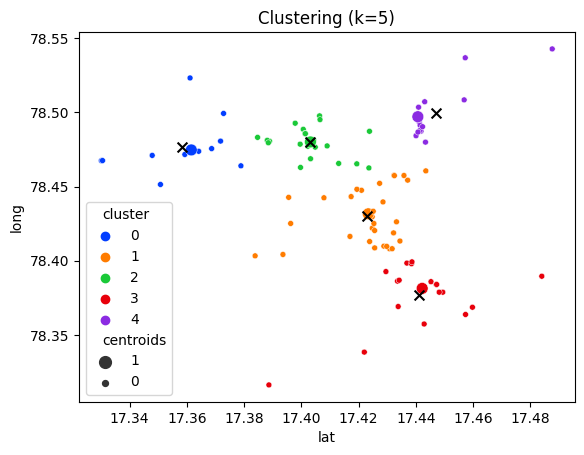

In [20]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [21]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location,zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """ """+color+""":"""
for i in lst_elements:
     legend_html = legend_html+""" 
      """+str(i)+""""""
legend_html = legend_html+""""""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_